In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [27]:
dataset = pd.read_csv('bor3hci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset=dataset.fillna(0)
dataset = dataset.drop((c for c in dataset.columns[-1:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output

n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))


In [28]:
y_test.shape

(25, 24)

Train on 246 samples, validate on 25 samples
Epoch 1/2000
 - 2s - loss: 0.3972 - val_loss: 0.3049
Epoch 2/2000
 - 0s - loss: 0.2747 - val_loss: 0.2950
Epoch 3/2000
 - 0s - loss: 0.2613 - val_loss: 0.2958
Epoch 4/2000
 - 0s - loss: 0.2567 - val_loss: 0.2959
Epoch 5/2000
 - 0s - loss: 0.2541 - val_loss: 0.2981
Epoch 6/2000
 - 0s - loss: 0.2526 - val_loss: 0.2990
Epoch 7/2000
 - 0s - loss: 0.2516 - val_loss: 0.2995
Epoch 8/2000
 - 0s - loss: 0.2512 - val_loss: 0.2998
Epoch 9/2000
 - 0s - loss: 0.2507 - val_loss: 0.3006
Epoch 10/2000
 - 0s - loss: 0.2502 - val_loss: 0.3001
Epoch 11/2000
 - 0s - loss: 0.2500 - val_loss: 0.3007
Epoch 12/2000
 - 0s - loss: 0.2496 - val_loss: 0.3008
Epoch 13/2000
 - 0s - loss: 0.2494 - val_loss: 0.3010
Epoch 14/2000
 - 0s - loss: 0.2490 - val_loss: 0.3006
Epoch 15/2000
 - 0s - loss: 0.2491 - val_loss: 0.3011
Epoch 16/2000
 - 0s - loss: 0.2486 - val_loss: 0.3009
Epoch 17/2000
 - 0s - loss: 0.2488 - val_loss: 0.3012
Epoch 18/2000
 - 0s - loss: 0.2484 - val_loss:

 - 0s - loss: 0.2312 - val_loss: 0.2856
Epoch 152/2000
 - 0s - loss: 0.2253 - val_loss: 0.2802
Epoch 153/2000
 - 0s - loss: 0.2204 - val_loss: 0.2806
Epoch 154/2000
 - 0s - loss: 0.2202 - val_loss: 0.2810
Epoch 155/2000
 - 0s - loss: 0.2189 - val_loss: 0.2810
Epoch 156/2000
 - 0s - loss: 0.2187 - val_loss: 0.2805
Epoch 157/2000
 - 0s - loss: 0.2187 - val_loss: 0.2804
Epoch 158/2000
 - 0s - loss: 0.2179 - val_loss: 0.2803
Epoch 159/2000
 - 0s - loss: 0.2169 - val_loss: 0.2800
Epoch 160/2000
 - 0s - loss: 0.2160 - val_loss: 0.2797
Epoch 161/2000
 - 0s - loss: 0.2172 - val_loss: 0.2794
Epoch 162/2000
 - 0s - loss: 0.2147 - val_loss: 0.2791
Epoch 163/2000
 - 0s - loss: 0.2160 - val_loss: 0.2789
Epoch 164/2000
 - 0s - loss: 0.2140 - val_loss: 0.2768
Epoch 165/2000
 - 0s - loss: 0.2147 - val_loss: 0.2777
Epoch 166/2000
 - 0s - loss: 0.2144 - val_loss: 0.2776
Epoch 167/2000
 - 0s - loss: 0.2171 - val_loss: 0.2774
Epoch 168/2000
 - 0s - loss: 0.2130 - val_loss: 0.2769
Epoch 169/2000
 - 0s - lo

Epoch 301/2000
 - 0s - loss: 0.1642 - val_loss: 0.2095
Epoch 302/2000
 - 0s - loss: 0.1591 - val_loss: 0.2095
Epoch 303/2000
 - 0s - loss: 0.1590 - val_loss: 0.2094
Epoch 304/2000
 - 0s - loss: 0.1610 - val_loss: 0.2092
Epoch 305/2000
 - 0s - loss: 0.1599 - val_loss: 0.2092
Epoch 306/2000
 - 0s - loss: 0.1652 - val_loss: 0.2092
Epoch 307/2000
 - 0s - loss: 0.1596 - val_loss: 0.2090
Epoch 308/2000
 - 0s - loss: 0.1585 - val_loss: 0.2090
Epoch 309/2000
 - 0s - loss: 0.1625 - val_loss: 0.2088
Epoch 310/2000
 - 0s - loss: 0.1625 - val_loss: 0.2089
Epoch 311/2000
 - 0s - loss: 0.1603 - val_loss: 0.2087
Epoch 312/2000
 - 0s - loss: 0.1623 - val_loss: 0.2084
Epoch 313/2000
 - 0s - loss: 0.1608 - val_loss: 0.2085
Epoch 314/2000
 - 0s - loss: 0.1640 - val_loss: 0.2085
Epoch 315/2000
 - 0s - loss: 0.1646 - val_loss: 0.2086
Epoch 316/2000
 - 0s - loss: 0.1622 - val_loss: 0.2080
Epoch 317/2000
 - 0s - loss: 0.1598 - val_loss: 0.2082
Epoch 318/2000
 - 0s - loss: 0.1597 - val_loss: 0.2082
Epoch 319/

Epoch 450/2000
 - 0s - loss: 0.1530 - val_loss: 0.2011
Epoch 451/2000
 - 0s - loss: 0.1522 - val_loss: 0.2015
Epoch 452/2000
 - 0s - loss: 0.1517 - val_loss: 0.2012
Epoch 453/2000
 - 0s - loss: 0.1528 - val_loss: 0.2011
Epoch 454/2000
 - 0s - loss: 0.1528 - val_loss: 0.2011
Epoch 455/2000
 - 0s - loss: 0.1526 - val_loss: 0.2010
Epoch 456/2000
 - 0s - loss: 0.1517 - val_loss: 0.2010
Epoch 457/2000
 - 0s - loss: 0.1542 - val_loss: 0.2009
Epoch 458/2000
 - 0s - loss: 0.1539 - val_loss: 0.2009
Epoch 459/2000
 - 0s - loss: 0.1511 - val_loss: 0.2008
Epoch 460/2000
 - 0s - loss: 0.1520 - val_loss: 0.2009
Epoch 461/2000
 - 0s - loss: 0.1516 - val_loss: 0.2007
Epoch 462/2000
 - 0s - loss: 0.1526 - val_loss: 0.2008
Epoch 463/2000
 - 0s - loss: 0.1529 - val_loss: 0.2008
Epoch 464/2000
 - 0s - loss: 0.1508 - val_loss: 0.2006
Epoch 465/2000
 - 0s - loss: 0.1530 - val_loss: 0.2005
Epoch 466/2000
 - 0s - loss: 0.1537 - val_loss: 0.2003
Epoch 467/2000
 - 0s - loss: 0.1522 - val_loss: 0.2003
Epoch 468/

Epoch 599/2000
 - 0s - loss: 0.1433 - val_loss: 0.1822
Epoch 600/2000
 - 0s - loss: 0.1438 - val_loss: 0.1820
Epoch 601/2000
 - 0s - loss: 0.1462 - val_loss: 0.1818
Epoch 602/2000
 - 0s - loss: 0.1457 - val_loss: 0.1818
Epoch 603/2000
 - 0s - loss: 0.1467 - val_loss: 0.1815
Epoch 604/2000
 - 0s - loss: 0.1441 - val_loss: 0.1814
Epoch 605/2000
 - 0s - loss: 0.1449 - val_loss: 0.1812
Epoch 606/2000
 - 0s - loss: 0.1426 - val_loss: 0.1810
Epoch 607/2000
 - 0s - loss: 0.1437 - val_loss: 0.1809
Epoch 608/2000
 - 0s - loss: 0.1437 - val_loss: 0.1807
Epoch 609/2000
 - 0s - loss: 0.1458 - val_loss: 0.1805
Epoch 610/2000
 - 0s - loss: 0.1441 - val_loss: 0.1803
Epoch 611/2000
 - 0s - loss: 0.1455 - val_loss: 0.1802
Epoch 612/2000
 - 0s - loss: 0.1456 - val_loss: 0.1800
Epoch 613/2000
 - 0s - loss: 0.1441 - val_loss: 0.1800
Epoch 614/2000
 - 0s - loss: 0.1425 - val_loss: 0.1797
Epoch 615/2000
 - 0s - loss: 0.1447 - val_loss: 0.1796
Epoch 616/2000
 - 0s - loss: 0.1453 - val_loss: 0.1794
Epoch 617/

Epoch 748/2000
 - 0s - loss: 0.1416 - val_loss: 0.1645
Epoch 749/2000
 - 0s - loss: 0.1394 - val_loss: 0.1642
Epoch 750/2000
 - 0s - loss: 0.1402 - val_loss: 0.1642
Epoch 751/2000
 - 0s - loss: 0.1392 - val_loss: 0.1644
Epoch 752/2000
 - 0s - loss: 0.1397 - val_loss: 0.1639
Epoch 753/2000
 - 0s - loss: 0.1422 - val_loss: 0.1641
Epoch 754/2000
 - 0s - loss: 0.1399 - val_loss: 0.1639
Epoch 755/2000
 - 0s - loss: 0.1389 - val_loss: 0.1639
Epoch 756/2000
 - 0s - loss: 0.1391 - val_loss: 0.1638
Epoch 757/2000
 - 0s - loss: 0.1400 - val_loss: 0.1637
Epoch 758/2000
 - 0s - loss: 0.1396 - val_loss: 0.1637
Epoch 759/2000
 - 0s - loss: 0.1409 - val_loss: 0.1634
Epoch 760/2000
 - 0s - loss: 0.1404 - val_loss: 0.1634
Epoch 761/2000
 - 0s - loss: 0.1411 - val_loss: 0.1633
Epoch 762/2000
 - 0s - loss: 0.1412 - val_loss: 0.1630
Epoch 763/2000
 - 0s - loss: 0.1389 - val_loss: 0.1631
Epoch 764/2000
 - 0s - loss: 0.1434 - val_loss: 0.1631
Epoch 765/2000
 - 0s - loss: 0.1404 - val_loss: 0.1630
Epoch 766/

Epoch 897/2000
 - 0s - loss: 0.1148 - val_loss: 0.1450
Epoch 898/2000
 - 0s - loss: 0.1153 - val_loss: 0.1450
Epoch 899/2000
 - 0s - loss: 0.1117 - val_loss: 0.1448
Epoch 900/2000
 - 0s - loss: 0.1138 - val_loss: 0.1450
Epoch 901/2000
 - 0s - loss: 0.1144 - val_loss: 0.1449
Epoch 902/2000
 - 0s - loss: 0.1141 - val_loss: 0.1449
Epoch 903/2000
 - 0s - loss: 0.1130 - val_loss: 0.1450
Epoch 904/2000
 - 0s - loss: 0.1145 - val_loss: 0.1450
Epoch 905/2000
 - 0s - loss: 0.1154 - val_loss: 0.1449
Epoch 906/2000
 - 0s - loss: 0.1126 - val_loss: 0.1449
Epoch 907/2000
 - 0s - loss: 0.1131 - val_loss: 0.1449
Epoch 908/2000
 - 0s - loss: 0.1180 - val_loss: 0.1450
Epoch 909/2000
 - 0s - loss: 0.1136 - val_loss: 0.1449
Epoch 910/2000
 - 0s - loss: 0.1166 - val_loss: 0.1447
Epoch 911/2000
 - 0s - loss: 0.1172 - val_loss: 0.1449
Epoch 912/2000
 - 0s - loss: 0.1151 - val_loss: 0.1449
Epoch 913/2000
 - 0s - loss: 0.1136 - val_loss: 0.1447
Epoch 914/2000
 - 0s - loss: 0.1134 - val_loss: 0.1448
Epoch 915/

 - 0s - loss: 0.1138 - val_loss: 0.1440
Epoch 1046/2000
 - 0s - loss: 0.1136 - val_loss: 0.1442
Epoch 1047/2000
 - 0s - loss: 0.1133 - val_loss: 0.1443
Epoch 1048/2000
 - 0s - loss: 0.1125 - val_loss: 0.1444
Epoch 1049/2000
 - 0s - loss: 0.1102 - val_loss: 0.1442
Epoch 1050/2000
 - 0s - loss: 0.1116 - val_loss: 0.1442
Epoch 1051/2000
 - 0s - loss: 0.1136 - val_loss: 0.1444
Epoch 1052/2000
 - 0s - loss: 0.1111 - val_loss: 0.1443
Epoch 1053/2000
 - 0s - loss: 0.1104 - val_loss: 0.1442
Epoch 1054/2000
 - 0s - loss: 0.1145 - val_loss: 0.1444
Epoch 1055/2000
 - 0s - loss: 0.1111 - val_loss: 0.1441
Epoch 1056/2000
 - 0s - loss: 0.1116 - val_loss: 0.1443
Epoch 1057/2000
 - 0s - loss: 0.1125 - val_loss: 0.1443
Epoch 1058/2000
 - 0s - loss: 0.1135 - val_loss: 0.1442
Epoch 1059/2000
 - 0s - loss: 0.1111 - val_loss: 0.1441
Epoch 1060/2000
 - 0s - loss: 0.1121 - val_loss: 0.1443
Epoch 1061/2000
 - 0s - loss: 0.1131 - val_loss: 0.1443
Epoch 1062/2000
 - 0s - loss: 0.1124 - val_loss: 0.1444
Epoch 10

Epoch 1192/2000
 - 0s - loss: 0.1117 - val_loss: 0.1438
Epoch 1193/2000
 - 0s - loss: 0.1119 - val_loss: 0.1439
Epoch 1194/2000
 - 0s - loss: 0.1102 - val_loss: 0.1435
Epoch 1195/2000
 - 0s - loss: 0.1110 - val_loss: 0.1434
Epoch 1196/2000
 - 0s - loss: 0.1102 - val_loss: 0.1435
Epoch 1197/2000
 - 0s - loss: 0.1110 - val_loss: 0.1436
Epoch 1198/2000
 - 0s - loss: 0.1119 - val_loss: 0.1437
Epoch 1199/2000
 - 0s - loss: 0.1129 - val_loss: 0.1436
Epoch 1200/2000
 - 0s - loss: 0.1149 - val_loss: 0.1436
Epoch 1201/2000
 - 0s - loss: 0.1100 - val_loss: 0.1434
Epoch 1202/2000
 - 0s - loss: 0.1109 - val_loss: 0.1437
Epoch 1203/2000
 - 0s - loss: 0.1106 - val_loss: 0.1436
Epoch 1204/2000
 - 0s - loss: 0.1137 - val_loss: 0.1438
Epoch 1205/2000
 - 0s - loss: 0.1115 - val_loss: 0.1436
Epoch 1206/2000
 - 0s - loss: 0.1111 - val_loss: 0.1437
Epoch 1207/2000
 - 0s - loss: 0.1096 - val_loss: 0.1435
Epoch 1208/2000
 - 0s - loss: 0.1126 - val_loss: 0.1435
Epoch 1209/2000
 - 0s - loss: 0.1135 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.1114 - val_loss: 0.1429
Epoch 1340/2000
 - 0s - loss: 0.1096 - val_loss: 0.1429
Epoch 1341/2000
 - 0s - loss: 0.1131 - val_loss: 0.1431
Epoch 1342/2000
 - 0s - loss: 0.1107 - val_loss: 0.1428
Epoch 1343/2000
 - 0s - loss: 0.1099 - val_loss: 0.1431
Epoch 1344/2000
 - 0s - loss: 0.1092 - val_loss: 0.1430
Epoch 1345/2000
 - 0s - loss: 0.1108 - val_loss: 0.1430
Epoch 1346/2000
 - 0s - loss: 0.1109 - val_loss: 0.1431
Epoch 1347/2000
 - 0s - loss: 0.1108 - val_loss: 0.1431
Epoch 1348/2000
 - 0s - loss: 0.1108 - val_loss: 0.1430
Epoch 1349/2000
 - 0s - loss: 0.1096 - val_loss: 0.1431
Epoch 1350/2000
 - 0s - loss: 0.1104 - val_loss: 0.1432
Epoch 1351/2000
 - 0s - loss: 0.1099 - val_loss: 0.1431
Epoch 1352/2000
 - 0s - loss: 0.1114 - val_loss: 0.1430
Epoch 1353/2000
 - 0s - loss: 0.1100 - val_loss: 0.1429
Epoch 1354/2000
 - 0s - loss: 0.1087 - val_loss: 0.1430
Epoch 1355/2000
 - 0s - loss: 0.1124 - val_loss: 0.1429
Epoch 1356/2000
 - 0s - loss: 0.1102 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.1090 - val_loss: 0.1427
Epoch 1487/2000
 - 0s - loss: 0.1102 - val_loss: 0.1427
Epoch 1488/2000
 - 0s - loss: 0.1092 - val_loss: 0.1428
Epoch 1489/2000
 - 0s - loss: 0.1128 - val_loss: 0.1427
Epoch 1490/2000
 - 0s - loss: 0.1089 - val_loss: 0.1427
Epoch 1491/2000
 - 0s - loss: 0.1095 - val_loss: 0.1426
Epoch 1492/2000
 - 0s - loss: 0.1090 - val_loss: 0.1428
Epoch 1493/2000
 - 0s - loss: 0.1095 - val_loss: 0.1429
Epoch 1494/2000
 - 0s - loss: 0.1084 - val_loss: 0.1428
Epoch 1495/2000
 - 0s - loss: 0.1103 - val_loss: 0.1427
Epoch 1496/2000
 - 0s - loss: 0.1088 - val_loss: 0.1427
Epoch 1497/2000
 - 0s - loss: 0.1083 - val_loss: 0.1427
Epoch 1498/2000
 - 0s - loss: 0.1085 - val_loss: 0.1428
Epoch 1499/2000
 - 0s - loss: 0.1090 - val_loss: 0.1427
Epoch 1500/2000
 - 0s - loss: 0.1078 - val_loss: 0.1426
Epoch 1501/2000
 - 0s - loss: 0.1104 - val_loss: 0.1427
Epoch 1502/2000
 - 0s - loss: 0.1084 - val_loss: 0.1428
Epoch 1503/2000
 - 0s - loss: 0.1090 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.1068 - val_loss: 0.1423
Epoch 1634/2000
 - 0s - loss: 0.1081 - val_loss: 0.1424
Epoch 1635/2000
 - 0s - loss: 0.1075 - val_loss: 0.1424
Epoch 1636/2000
 - 0s - loss: 0.1071 - val_loss: 0.1423
Epoch 1637/2000
 - 0s - loss: 0.1100 - val_loss: 0.1423
Epoch 1638/2000
 - 0s - loss: 0.1083 - val_loss: 0.1424
Epoch 1639/2000
 - 0s - loss: 0.1082 - val_loss: 0.1424
Epoch 1640/2000
 - 0s - loss: 0.1101 - val_loss: 0.1423
Epoch 1641/2000
 - 0s - loss: 0.1119 - val_loss: 0.1425
Epoch 1642/2000
 - 0s - loss: 0.1080 - val_loss: 0.1423
Epoch 1643/2000
 - 0s - loss: 0.1083 - val_loss: 0.1423
Epoch 1644/2000
 - 0s - loss: 0.1097 - val_loss: 0.1424
Epoch 1645/2000
 - 0s - loss: 0.1086 - val_loss: 0.1423
Epoch 1646/2000
 - 0s - loss: 0.1092 - val_loss: 0.1425
Epoch 1647/2000
 - 0s - loss: 0.1070 - val_loss: 0.1422
Epoch 1648/2000
 - 0s - loss: 0.1081 - val_loss: 0.1424
Epoch 1649/2000
 - 0s - loss: 0.1107 - val_loss: 0.1423
Epoch 1650/2000
 - 0s - loss: 0.1074 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.1073 - val_loss: 0.1420
Epoch 1781/2000
 - 0s - loss: 0.1069 - val_loss: 0.1421
Epoch 1782/2000
 - 0s - loss: 0.1073 - val_loss: 0.1419
Epoch 1783/2000
 - 0s - loss: 0.1074 - val_loss: 0.1420
Epoch 1784/2000
 - 0s - loss: 0.1092 - val_loss: 0.1420
Epoch 1785/2000
 - 0s - loss: 0.1065 - val_loss: 0.1420
Epoch 1786/2000
 - 0s - loss: 0.1086 - val_loss: 0.1420
Epoch 1787/2000
 - 0s - loss: 0.1097 - val_loss: 0.1422
Epoch 1788/2000
 - 0s - loss: 0.1066 - val_loss: 0.1419
Epoch 1789/2000
 - 0s - loss: 0.1078 - val_loss: 0.1420
Epoch 1790/2000
 - 0s - loss: 0.1127 - val_loss: 0.1420
Epoch 1791/2000
 - 0s - loss: 0.1073 - val_loss: 0.1421
Epoch 1792/2000
 - 0s - loss: 0.1077 - val_loss: 0.1421
Epoch 1793/2000
 - 0s - loss: 0.1075 - val_loss: 0.1419
Epoch 1794/2000
 - 0s - loss: 0.1092 - val_loss: 0.1421
Epoch 1795/2000
 - 0s - loss: 0.1088 - val_loss: 0.1422
Epoch 1796/2000
 - 0s - loss: 0.1069 - val_loss: 0.1420
Epoch 1797/2000
 - 0s - loss: 0.1086 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.1094 - val_loss: 0.1418
Epoch 1928/2000
 - 0s - loss: 0.1093 - val_loss: 0.1416
Epoch 1929/2000
 - 0s - loss: 0.1076 - val_loss: 0.1416
Epoch 1930/2000
 - 0s - loss: 0.1076 - val_loss: 0.1417
Epoch 1931/2000
 - 0s - loss: 0.1068 - val_loss: 0.1418
Epoch 1932/2000
 - 0s - loss: 0.1079 - val_loss: 0.1419
Epoch 1933/2000
 - 0s - loss: 0.1093 - val_loss: 0.1419
Epoch 1934/2000
 - 0s - loss: 0.1069 - val_loss: 0.1417
Epoch 1935/2000
 - 0s - loss: 0.1091 - val_loss: 0.1417
Epoch 1936/2000
 - 0s - loss: 0.1060 - val_loss: 0.1417
Epoch 1937/2000
 - 0s - loss: 0.1069 - val_loss: 0.1418
Epoch 1938/2000
 - 0s - loss: 0.1083 - val_loss: 0.1419
Epoch 1939/2000
 - 0s - loss: 0.1077 - val_loss: 0.1419
Epoch 1940/2000
 - 0s - loss: 0.1090 - val_loss: 0.1418
Epoch 1941/2000
 - 0s - loss: 0.1079 - val_loss: 0.1419
Epoch 1942/2000
 - 0s - loss: 0.1044 - val_loss: 0.1416
Epoch 1943/2000
 - 0s - loss: 0.1075 - val_loss: 0.1417
Epoch 1944/2000
 - 0s - loss: 0.1075 - val_loss:

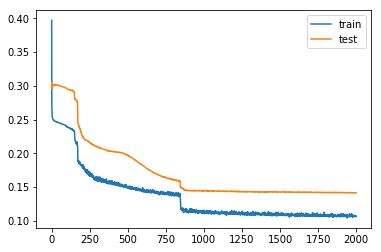

In [30]:
# define model
model = Sequential()
model.add(LSTM(150, activation='softmax', input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.019))
model.add(Dense(100,activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dense(140,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adagrad', loss='mae')
history = model.fit(X_train,y_train,epochs=2000,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
#X_test = X_test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 355.416


In [32]:
i=0
ninhat=[]
x_input = scaled[-12:,:] 
x_input = x_input.reshape((1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input, verbose=0)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [33]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/05/92,900.0,14,25.8,135.348837,411.258980,0.0,329.108527,0.0
01/06/92,750.0,14,29.9,150.735786,450.024963,0.0,334.949833,0.0
01/07/92,750.0,14,30.2,149.602649,451.258490,0.0,331.523179,0.0
01/08/92,1500.0,21,31.0,323.709677,398.736441,0.0,811.838710,0.0
01/09/92,1475.0,21,26.0,294.423077,404.641083,0.0,727.615385,0.0


In [34]:
print(ninhat.shape)

(192,)


In [35]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)

In [36]:
print(ninhat.shape)
print(ninhat[:,4:7])

(24, 8)
[[1.93640404e+02 5.44307981e-01 1.21280611e+03]
 [0.00000000e+00 0.00000000e+00 1.24647223e+03]
 [2.02272356e+02 5.48315642e-01 1.14578139e+03]
 [1.69398241e+02 5.46499923e-01 1.20073599e+03]
 [0.00000000e+00 0.00000000e+00 1.24574454e+03]
 [1.79122239e+02 5.50002244e-01 1.12497564e+03]
 [1.91808485e+02 5.38728745e-01 1.19015542e+03]
 [0.00000000e+00 0.00000000e+00 1.23018248e+03]
 [1.93646919e+02 5.37297224e-01 1.12101202e+03]
 [2.85110349e+02 5.12406344e-01 1.16430654e+03]
 [0.00000000e+00 0.00000000e+00 1.18224514e+03]
 [2.63784993e+02 5.00693165e-01 1.12020967e+03]
 [3.72503617e+02 4.86035106e-01 1.16868283e+03]
 [0.00000000e+00 0.00000000e+00 1.17638586e+03]
 [3.40085377e+02 4.60110764e-01 1.14361263e+03]
 [3.89935275e+02 4.76237256e-01 1.16899746e+03]
 [0.00000000e+00 0.00000000e+00 1.17755645e+03]
 [3.57596479e+02 4.48781707e-01 1.14779980e+03]
 [4.04327044e+02 4.67829725e-01 1.16900639e+03]
 [0.00000000e+00 0.00000000e+00 1.17871246e+03]
 [3.72536250e+02 4.39955192e-01 

In [37]:
print(nx_input.shape)
print(nyhat.shape)

(1, 12, 8)
(3, 8)


In [38]:
nin_yhat = nx_input.reshape((n_steps_in, n_features))
ninv_yhat = scaler.inverse_transform(nin_yhat)
print(ninv_yhat.shape)

(12, 8)


In [39]:
print(ninv_yhat[:,4:7])

[[3.7250363e+02 4.8603511e-01 1.1686829e+03]
 [0.0000000e+00 0.0000000e+00 1.1763859e+03]
 [3.4008539e+02 4.6011075e-01 1.1436127e+03]
 [3.8993527e+02 4.7623727e-01 1.1689974e+03]
 [0.0000000e+00 0.0000000e+00 1.1775564e+03]
 [3.5759647e+02 4.4878170e-01 1.1477998e+03]
 [4.0432706e+02 4.6782973e-01 1.1690063e+03]
 [0.0000000e+00 0.0000000e+00 1.1787124e+03]
 [3.7253625e+02 4.3995520e-01 1.1529352e+03]
 [4.1821716e+02 4.5939809e-01 1.1711287e+03]
 [0.0000000e+00 0.0000000e+00 1.1842327e+03]
 [3.8843881e+02 4.3268558e-01 1.1614158e+03]]


In [40]:
#print(nx_input[0,2] ,nx_input[0,5])

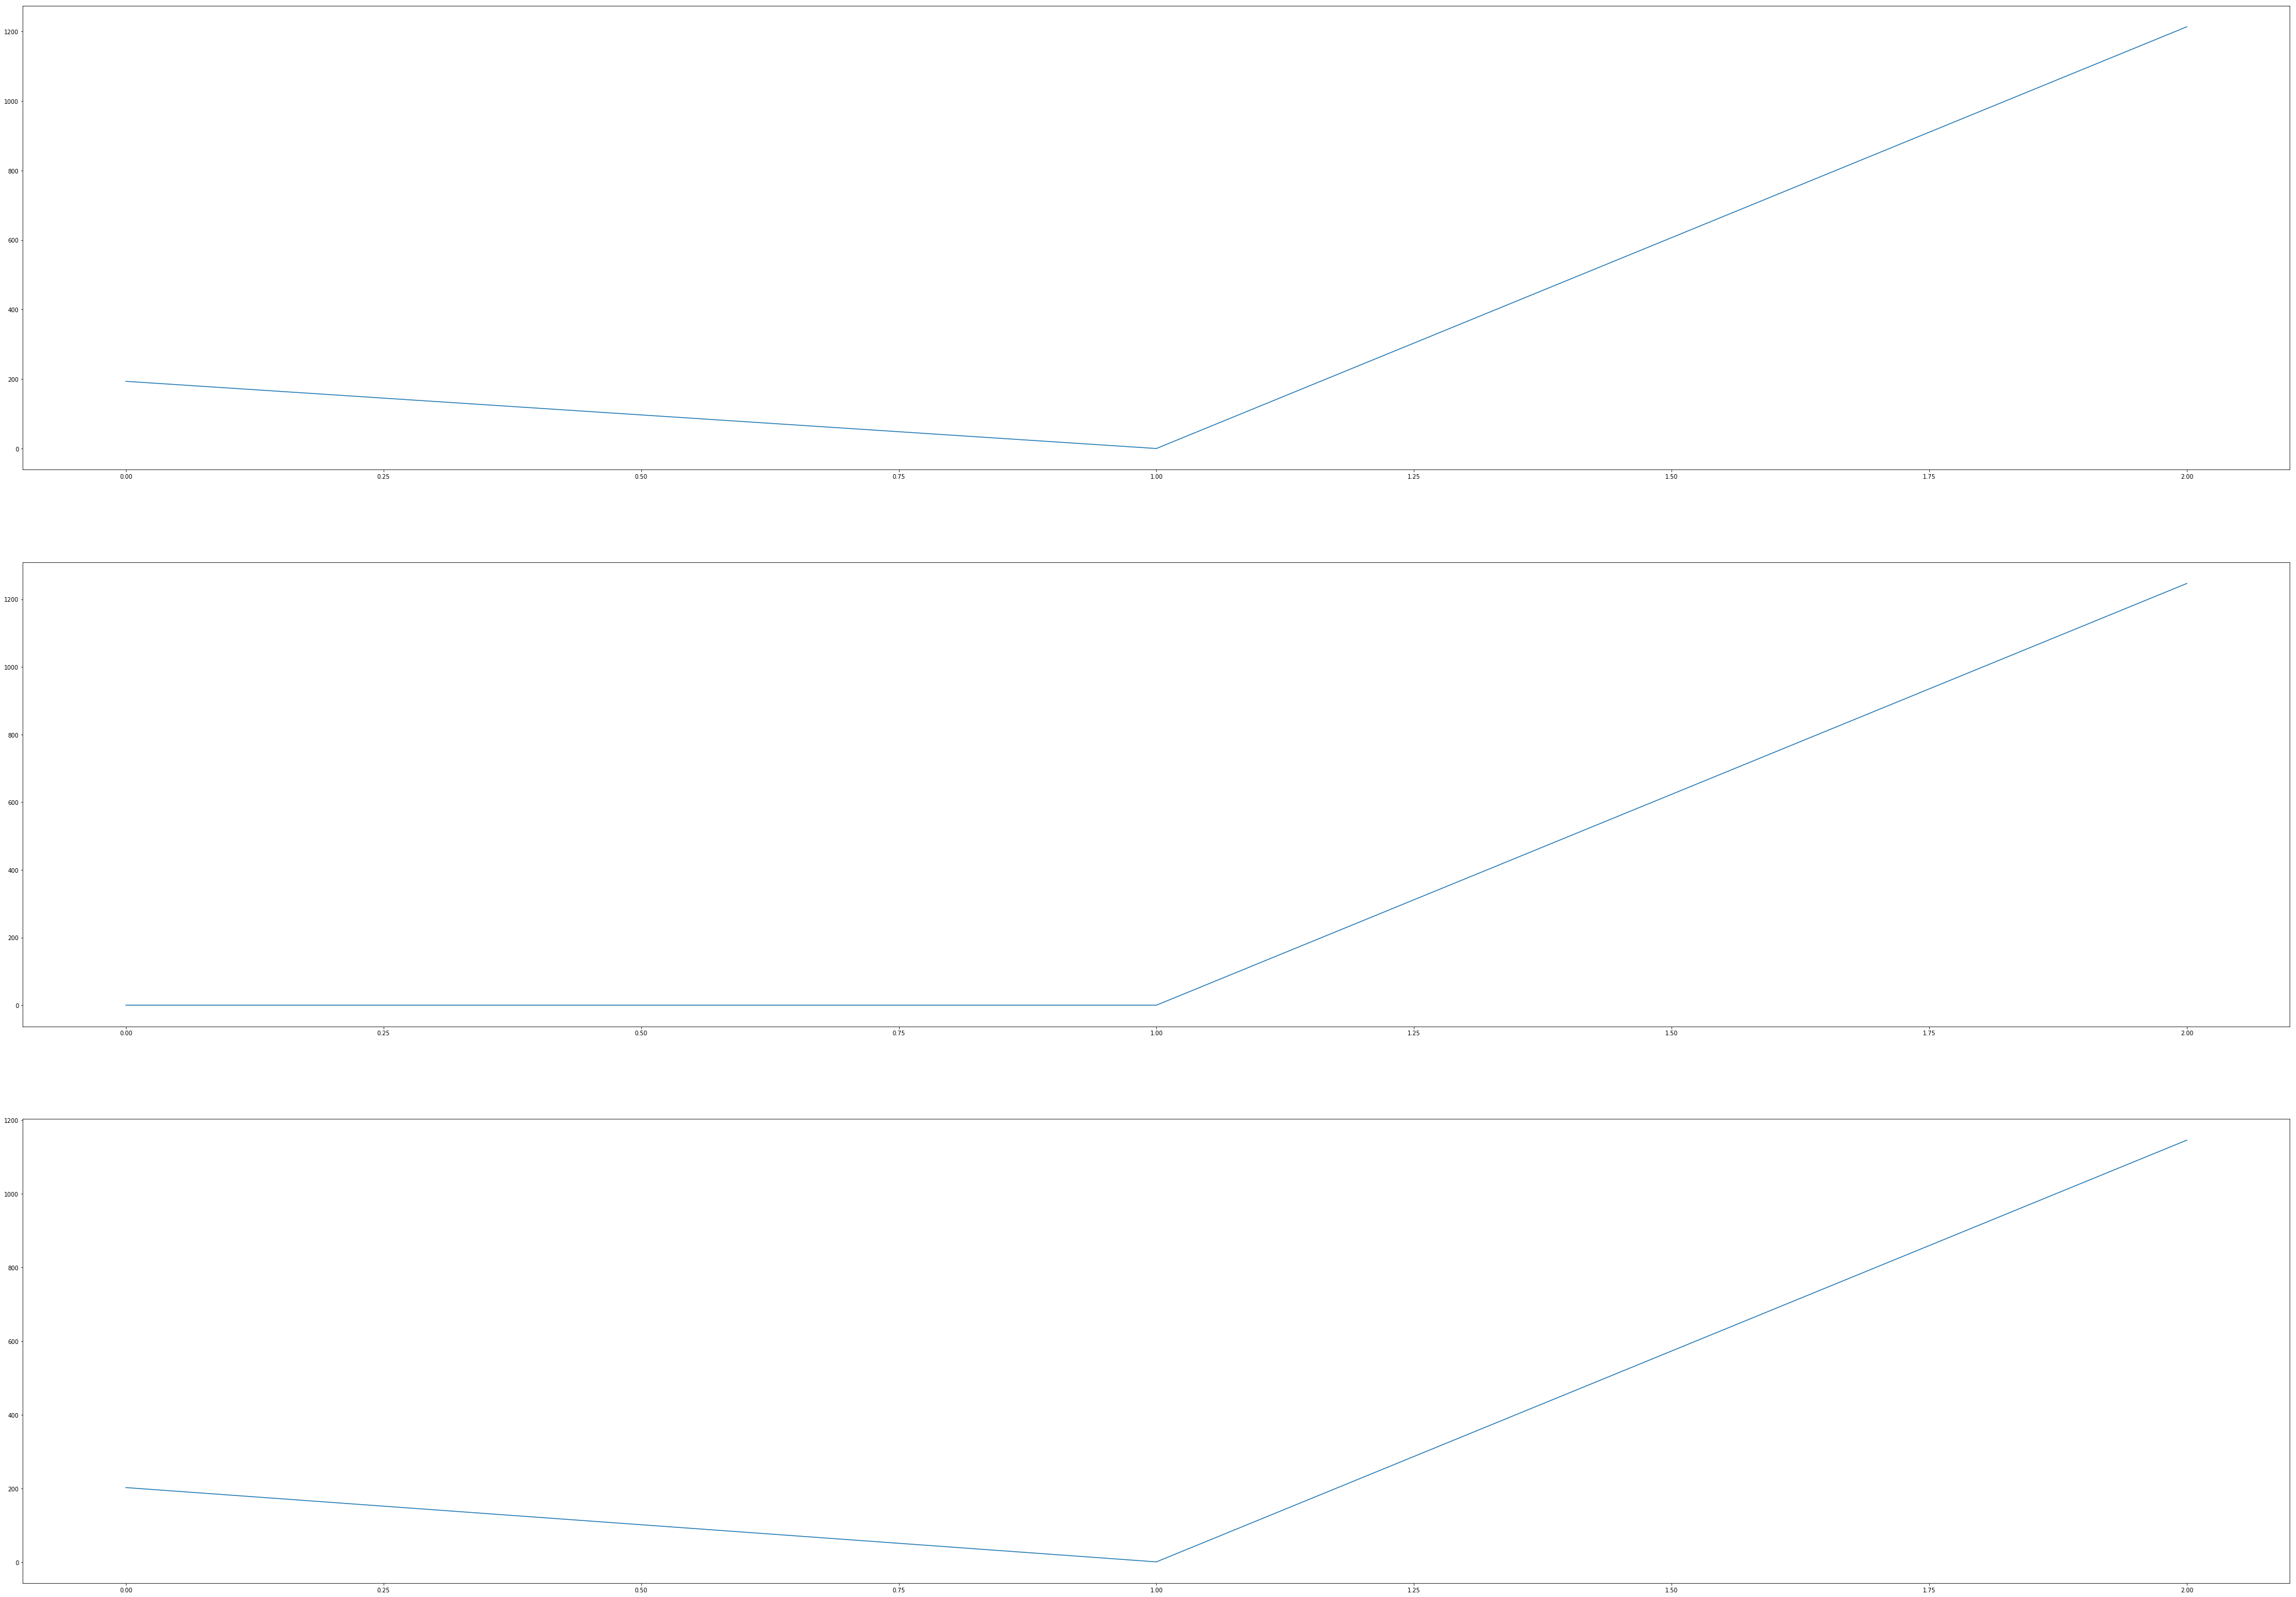

In [41]:
groups = [0,1,2]
i = 1
# plot each column
plt.figure(figsize=(70,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[group, 4:7])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [42]:
new = dataset

In [43]:
new.shape

(272, 8)

In [44]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [45]:
new.index

Index(['01/05/92', '01/06/92', '01/07/92', '01/08/92', '01/09/92', '01/10/92',
       '01/11/92', '01/12/92', '01/01/93', '01/02/93',
       ...
       '01/03/14', '01/04/14', '01/05/14', '01/06/14', '01/07/14', '01/08/14',
       '01/09/14', '01/10/14', '01/11/14', '01/12/14'],
      dtype='object', name='Date', length=272)

In [46]:
nin=new.index[-1]
print(nin)

01/12/14


In [47]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [48]:
newxhat.shape

(24, 8)

In [49]:
new=new.append(newxhat)
new.shape

(296, 8)

In [50]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/05/92,900.0,14.0,25.8,135.348837,411.258980,0.0,329.108527,0.0
01/06/92,750.0,14.0,29.9,150.735786,450.024963,0.0,334.949833,0.0
01/07/92,750.0,14.0,30.2,149.602649,451.258490,0.0,331.523179,0.0
01/08/92,1500.0,21.0,31.0,323.709677,398.736441,0.0,811.838710,0.0


In [51]:
newbori = new.to_csv('newbori3c.csv')